# Cluster Analysis

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
# plt.style.use('ggplot')
%matplotlib inline

from scipy import stats
get_ipython().magic(u'config IPCompleter.greedy=True')



## 1. Day 7: KMean Clusters

### 1.1 Extracting final features for each cluster in day 7 model

In [2]:
# Import the clusters 
df_c0 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/cluster_00_accounts.tsv", sep="\t")
df_c1 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/cluster_01_accounts.tsv", sep="\t")
df_c2 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/cluster_02_accounts.tsv", sep="\t")
df_c3 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/cluster_03_accounts.tsv", sep="\t")
df_c4 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/cluster_04_accounts.tsv", sep="\t")
df_c5 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/cluster_05_accounts.tsv", sep="\t")


In [3]:
df_c0 = df_c0[['systemid', 'cluster_id']]
df_c1 = df_c1[['systemid', 'cluster_id']]
df_c2 = df_c2[['systemid', 'cluster_id']]
df_c3 = df_c3[['systemid', 'cluster_id']]
df_c4 = df_c4[['systemid', 'cluster_id']]
df_c5 = df_c5[['systemid', 'cluster_id']]

In [4]:
df_c0.head()

,systemid,cluster_id
0,3592465,0
1,3592467,0
2,3592469,0
3,3592473,0
4,3592477,0


In [5]:
# Accounts list (systemid) in each cluster
c0_systemid_list = list(df_c0['systemid'])
c1_systemid_list = list(df_c1['systemid'])
c2_systemid_list = list(df_c2['systemid'])
c3_systemid_list = list(df_c3['systemid'])
c4_systemid_list = list(df_c4['systemid'])
c5_systemid_list = list(df_c5['systemid'])


In [6]:
# Store and print cluster sizes 
cls_sizes = {'cluster_id': ['cluster 00', 'cluster 01', 'cluster 02', 'cluster 03', 'cluster 04', 'cluster 05'], 
             'size' : [df_c0.shape[0], df_c1.shape[0], df_c2.shape[0], df_c3.shape[0], df_c4.shape[0], df_c5.shape[0]]
            }
df_cls_sizes = pd.DataFrame(cls_sizes, columns =['cluster_id', 'size'])

In [7]:
df_cls_sizes

,cluster_id,size
0,cluster 00,141682
1,cluster 01,15898
2,cluster 02,24913
3,cluster 03,107520
4,cluster 04,156172
5,cluster 05,6380


In [8]:
# Import fraud accounts list dated in last 12 months
fraud_accounts_12months = pd.read_csv(
    "/Users/dwahid/Documents/GitHub/fraud_detection/data_final/fraud_accounts_20180801_to_20190730.tsv", 
        sep="\t")

In [9]:
########################## Checking the number of fraud accounts exist in each Cluster ##########################

fraud_accounts_12months_list = list(fraud_accounts_12months['systemid'])
# Initialization: The number of fraud accounts in each clusters
fraud_accounts_num_c0 = 0
fraud_accounts_num_c1 = 0
fraud_accounts_num_c2 = 0
fraud_accounts_num_c3 = 0
fraud_accounts_num_c4 = 0
fraud_accounts_num_c5 = 0

# Initialization: The fraud accounts in each clusters
fraud_accounts_c0 = []
fraud_accounts_c1 = []
fraud_accounts_c2 = []
fraud_accounts_c3 = []
fraud_accounts_c4 = []
fraud_accounts_c5 = []


for systemid in fraud_accounts_12months_list:
    
    # checking in cluster 00
    if systemid in c0_systemid_list:
        #print('Exist Cluster 00')
        fraud_accounts_num_c0 += 1
        fraud_accounts_c0.append(systemid)
        
    # checking in cluster 01   
    elif systemid in c1_systemid_list:
        #print('Exist Cluster 01')
        fraud_accounts_num_c1 += 1
        fraud_accounts_c1.append(systemid)
        
    # checking in cluster 02
    elif systemid in c2_systemid_list:
        #print('Exist Cluster 02')
        fraud_accounts_num_c2 += 1
        fraud_accounts_c2.append(systemid)
        
    # checking in cluster 03
    elif systemid in c3_systemid_list:
        #print('Exist Cluster 03')
        fraud_accounts_num_c3 += 1
        fraud_accounts_c3.append(systemid)
    
    # checking in cluster 04
    elif systemid in c4_systemid_list:
        #print('Exist Cluster 04')
        fraud_accounts_num_c4 += 1
        fraud_accounts_c4.append(systemid)
        
    # checking in cluster 05
    elif systemid in c5_systemid_list:
        #print('Exist Cluster 05')
        fraud_accounts_num_c5 += 1
        fraud_accounts_c5.append(systemid)
        
    else:
        print('NOT')
        continue

In [10]:
# Store and print the number of existance of fraud accounts in each cluster
fraud_accounts_num = {'cluster_id': ['cluster 00', 'cluster 01', 'cluster 02', 'cluster 03', 'cluster 04', 'cluster 05'], 
             '#fraud_accounts' : [fraud_accounts_num_c0, fraud_accounts_num_c1, fraud_accounts_num_c2, fraud_accounts_num_c3, fraud_accounts_num_c4, fraud_accounts_num_c5]
            }
df_cls_fraud_accounts_num = pd.DataFrame(fraud_accounts_num, columns =['cluster_id', '#fraud_accounts'])
        

In [11]:
# Add number of frauds accounts corresponding to the cluster sieze and id
df_cls_sizes['#fraud_accounts']= df_cls_fraud_accounts_num['#fraud_accounts']

In [12]:
# Checking
df_cls_sizes

,cluster_id,size,#fraud_accounts
0,cluster 00,141682,1
1,cluster 01,15898,1
2,cluster 02,24913,19
3,cluster 03,107520,2
4,cluster 04,156172,0
5,cluster 05,6380,16


In [13]:
# Cheking fraud systemid in each clusters
# fraud_accounts_c2

In [14]:
######### Get Final features data correspoinding to each cluster identified by this clustering model #############

# Final features for day 7 model
df_final_features_day_7 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_7.tsv", 
        sep="\t")

In [15]:
# Day 7 KMean model: Final features for each identified cluster
df_c0_final_feature_day_7  = df_final_features_day_7.loc[df_final_features_day_7['systemid'].isin(c0_systemid_list)]
df_c1_final_feature_day_7  = df_final_features_day_7.loc[df_final_features_day_7['systemid'].isin(c1_systemid_list)]
df_c2_final_feature_day_7  = df_final_features_day_7.loc[df_final_features_day_7['systemid'].isin(c2_systemid_list)]
df_c3_final_feature_day_7  = df_final_features_day_7.loc[df_final_features_day_7['systemid'].isin(c3_systemid_list)]
df_c4_final_feature_day_7  = df_final_features_day_7.loc[df_final_features_day_7['systemid'].isin(c4_systemid_list)]
df_c5_final_feature_day_7  = df_final_features_day_7.loc[df_final_features_day_7['systemid'].isin(c5_systemid_list)]

In [32]:
# Removing 'NaN' with zero
df_c0_final_feature_day_7.fillna(0, inplace=True)
df_c1_final_feature_day_7.fillna(0, inplace=True)
df_c2_final_feature_day_7.fillna(0, inplace=True)
df_c3_final_feature_day_7.fillna(0, inplace=True)
df_c4_final_feature_day_7.fillna(0, inplace=True)
df_c5_final_feature_day_7.fillna(0, inplace=True)

/Users/dwahid/Documents/GitHub/fraud_detection/venv_fraud/lib/python2.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


### 1.2 Analysis: Cluster 00 to Cluster 05 (Day 7 model)

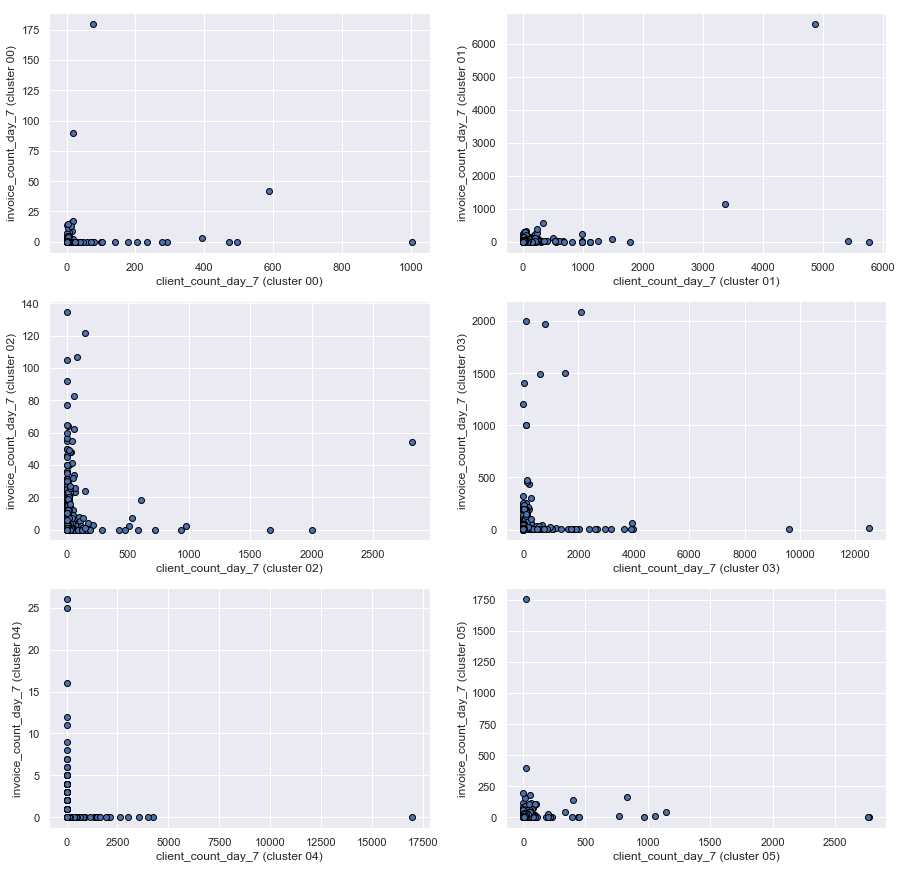

In [17]:
############################## Analysis: Cluster 00 (day 7 model) ##############################################

#### 'client_count_day_7' vs. 'invoice_count_day7'

# Pair-to-pair cross-validation plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
# ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

# cluster 00 ------------------------------------------------------ 
x0 = df_c0_final_feature_day_7['client_count_day_7']
y0 = df_c0_final_feature_day_7['invoice_count_day_7']

ax0.scatter(x0, y0, edgecolors=(0, 0, 0))
ax0.set_xlabel('client_count_day_7 (cluster 00)')
ax0.set_ylabel('invoice_count_day_7 (cluster 00)')


# cluster 01 ------------------------------------------------------ 
x1 = df_c1_final_feature_day_7['client_count_day_7']
y1 = df_c1_final_feature_day_7['invoice_count_day_7']

ax1.scatter(x1, y1, edgecolors=(0, 0, 0))
ax1.set_xlabel('client_count_day_7 (cluster 01)')
ax1.set_ylabel('invoice_count_day_7 (cluster 01)')


# cluster 02 ------------------------------------------------------ 
x2 = df_c2_final_feature_day_7['client_count_day_7']
y2 = df_c2_final_feature_day_7['invoice_count_day_7']

ax2.scatter(x2, y2, edgecolors=(0, 0, 0))
ax2.set_xlabel('client_count_day_7 (cluster 02)')
ax2.set_ylabel('invoice_count_day_7 (cluster 02)')

# cluster 03 ------------------------------------------------------ 
x3 = df_c3_final_feature_day_7['client_count_day_7']
y3 = df_c3_final_feature_day_7['invoice_count_day_7']

ax3.scatter(x3, y3, edgecolors=(0, 0, 0))
ax3.set_xlabel('client_count_day_7 (cluster 03)')
ax3.set_ylabel('invoice_count_day_7 (cluster 03)')

# cluster 04 ------------------------------------------------------ 
x4 = df_c4_final_feature_day_7['client_count_day_7']
y4 = df_c4_final_feature_day_7['invoice_count_day_7']

ax4.scatter(x4, y4, edgecolors=(0, 0, 0))
ax4.set_xlabel('client_count_day_7 (cluster 04)')
ax4.set_ylabel('invoice_count_day_7 (cluster 04)')


# cluster 05 ------------------------------------------------------ 
x5 = df_c5_final_feature_day_7['client_count_day_7']
y5 = df_c5_final_feature_day_7['invoice_count_day_7']

ax5.scatter(x5, y5, edgecolors=(0, 0, 0))
ax5.set_xlabel('client_count_day_7 (cluster 05)')
ax5.set_ylabel('invoice_count_day_7 (cluster 05)')

plt.show()

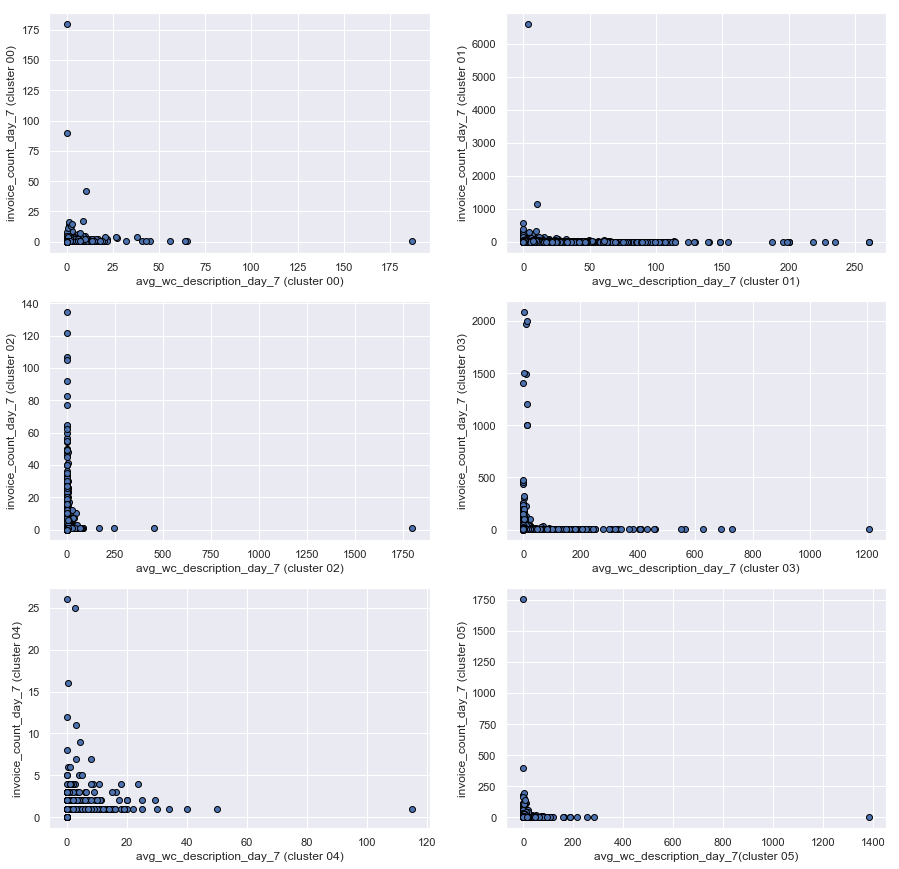

In [18]:
############################## Analysis: Cluster 00 (day 7 model) ##############################################

#### 'avg_wc_description_day_7' vs. 'invoice_count_day7'

# Pair-to-pair cross-validation plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
# ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

# cluster 00 ------------------------------------------------------ 
x0 = df_c0_final_feature_day_7['avg_wc_description_day_7']
y0 = df_c0_final_feature_day_7['invoice_count_day_7']

ax0.scatter(x0, y0, edgecolors=(0, 0, 0))
ax0.set_xlabel('avg_wc_description_day_7 (cluster 00)')
ax0.set_ylabel('invoice_count_day_7 (cluster 00)')


# cluster 01 ------------------------------------------------------ 
x1 = df_c1_final_feature_day_7['avg_wc_description_day_7']
y1 = df_c1_final_feature_day_7['invoice_count_day_7']

ax1.scatter(x1, y1, edgecolors=(0, 0, 0))
ax1.set_xlabel('avg_wc_description_day_7 (cluster 01)')
ax1.set_ylabel('invoice_count_day_7 (cluster 01)')


# cluster 02 ------------------------------------------------------ 
x2 = df_c2_final_feature_day_7['avg_wc_description_day_7']
y2 = df_c2_final_feature_day_7['invoice_count_day_7']

ax2.scatter(x2, y2, edgecolors=(0, 0, 0))
ax2.set_xlabel('avg_wc_description_day_7 (cluster 02)')
ax2.set_ylabel('invoice_count_day_7 (cluster 02)')

# cluster 03 ------------------------------------------------------ 
x3 = df_c3_final_feature_day_7['avg_wc_description_day_7']
y3 = df_c3_final_feature_day_7['invoice_count_day_7']

ax3.scatter(x3, y3, edgecolors=(0, 0, 0))
ax3.set_xlabel('avg_wc_description_day_7 (cluster 03)')
ax3.set_ylabel('invoice_count_day_7 (cluster 03)')

# cluster 04 ------------------------------------------------------ 
x4 = df_c4_final_feature_day_7['avg_wc_description_day_7']
y4 = df_c4_final_feature_day_7['invoice_count_day_7']

ax4.scatter(x4, y4, edgecolors=(0, 0, 0))
ax4.set_xlabel('avg_wc_description_day_7 (cluster 04)')
ax4.set_ylabel('invoice_count_day_7 (cluster 04)')


# cluster 05 ------------------------------------------------------ 
x5 = df_c5_final_feature_day_7['avg_wc_description_day_7']
y5 = df_c5_final_feature_day_7['invoice_count_day_7']

ax5.scatter(x5, y5, edgecolors=(0, 0, 0))
ax5.set_xlabel('avg_wc_description_day_7(cluster 05)')
ax5.set_ylabel('invoice_count_day_7 (cluster 05)')

plt.show()

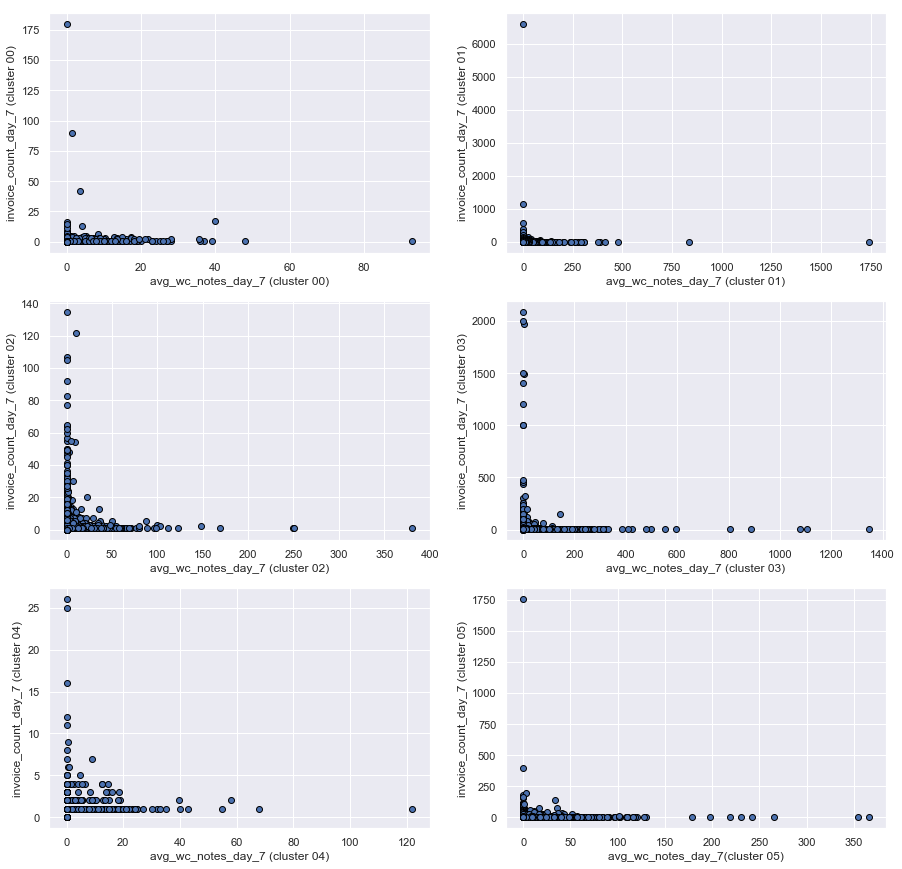

In [19]:
############################## Analysis: Cluster 00 (day 7 model) ##############################################

#### 'avg_wc_notes_day_7' vs. 'invoice_count_day7'

# Pair-to-pair cross-validation plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
# ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

# cluster 00 ------------------------------------------------------ 
x0 = df_c0_final_feature_day_7['avg_wc_notes_day_7']
y0 = df_c0_final_feature_day_7['invoice_count_day_7']

ax0.scatter(x0, y0, edgecolors=(0, 0, 0))
ax0.set_xlabel('avg_wc_notes_day_7 (cluster 00)')
ax0.set_ylabel('invoice_count_day_7 (cluster 00)')


# cluster 01 ------------------------------------------------------ 
x1 = df_c1_final_feature_day_7['avg_wc_notes_day_7']
y1 = df_c1_final_feature_day_7['invoice_count_day_7']

ax1.scatter(x1, y1, edgecolors=(0, 0, 0))
ax1.set_xlabel('avg_wc_notes_day_7 (cluster 01)')
ax1.set_ylabel('invoice_count_day_7 (cluster 01)')


# cluster 02 ------------------------------------------------------ 
x2 = df_c2_final_feature_day_7['avg_wc_notes_day_7']
y2 = df_c2_final_feature_day_7['invoice_count_day_7']

ax2.scatter(x2, y2, edgecolors=(0, 0, 0))
ax2.set_xlabel('avg_wc_notes_day_7 (cluster 02)')
ax2.set_ylabel('invoice_count_day_7 (cluster 02)')

# cluster 03 ------------------------------------------------------ 
x3 = df_c3_final_feature_day_7['avg_wc_notes_day_7']
y3 = df_c3_final_feature_day_7['invoice_count_day_7']

ax3.scatter(x3, y3, edgecolors=(0, 0, 0))
ax3.set_xlabel('avg_wc_notes_day_7 (cluster 03)')
ax3.set_ylabel('invoice_count_day_7 (cluster 03)')

# cluster 04 ------------------------------------------------------ 
x4 = df_c4_final_feature_day_7['avg_wc_notes_day_7']
y4 = df_c4_final_feature_day_7['invoice_count_day_7']

ax4.scatter(x4, y4, edgecolors=(0, 0, 0))
ax4.set_xlabel('avg_wc_notes_day_7 (cluster 04)')
ax4.set_ylabel('invoice_count_day_7 (cluster 04)')


# cluster 05 ------------------------------------------------------ 
x5 = df_c5_final_feature_day_7['avg_wc_notes_day_7']
y5 = df_c5_final_feature_day_7['invoice_count_day_7']

ax5.scatter(x5, y5, edgecolors=(0, 0, 0))
ax5.set_xlabel('avg_wc_notes_day_7(cluster 05)')
ax5.set_ylabel('invoice_count_day_7 (cluster 05)')

plt.show()

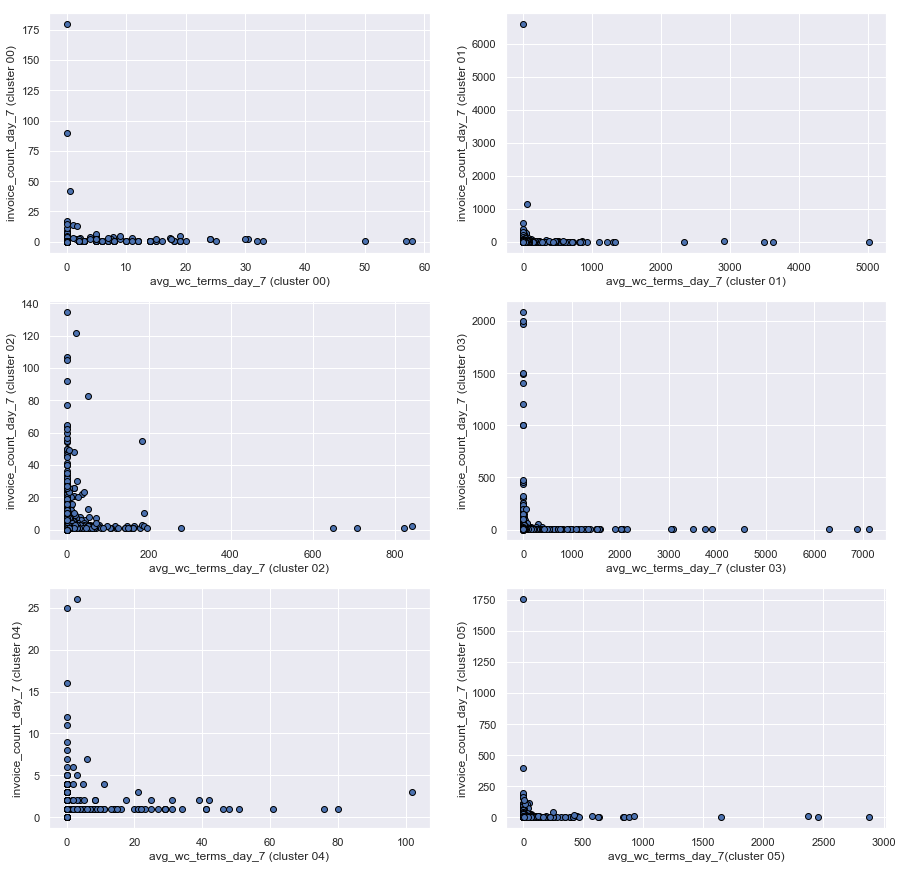

In [20]:
############################## Analysis: Cluster 00 (day 7 model) ##############################################

#### 'avg_wc_terms_day_7' vs. 'invoice_count_day7'

# Pair-to-pair cross-validation plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
# ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

# cluster 00 ------------------------------------------------------ 
x0 = df_c0_final_feature_day_7['avg_wc_terms_day_7']
y0 = df_c0_final_feature_day_7['invoice_count_day_7']

ax0.scatter(x0, y0, edgecolors=(0, 0, 0))
ax0.set_xlabel('avg_wc_terms_day_7 (cluster 00)')
ax0.set_ylabel('invoice_count_day_7 (cluster 00)')


# cluster 01 ------------------------------------------------------ 
x1 = df_c1_final_feature_day_7['avg_wc_terms_day_7']
y1 = df_c1_final_feature_day_7['invoice_count_day_7']

ax1.scatter(x1, y1, edgecolors=(0, 0, 0))
ax1.set_xlabel('avg_wc_terms_day_7 (cluster 01)')
ax1.set_ylabel('invoice_count_day_7 (cluster 01)')


# cluster 02 ------------------------------------------------------ 
x2 = df_c2_final_feature_day_7['avg_wc_terms_day_7']
y2 = df_c2_final_feature_day_7['invoice_count_day_7']

ax2.scatter(x2, y2, edgecolors=(0, 0, 0))
ax2.set_xlabel('avg_wc_terms_day_7 (cluster 02)')
ax2.set_ylabel('invoice_count_day_7 (cluster 02)')

# cluster 03 ------------------------------------------------------ 
x3 = df_c3_final_feature_day_7['avg_wc_terms_day_7']
y3 = df_c3_final_feature_day_7['invoice_count_day_7']

ax3.scatter(x3, y3, edgecolors=(0, 0, 0))
ax3.set_xlabel('avg_wc_terms_day_7 (cluster 03)')
ax3.set_ylabel('invoice_count_day_7 (cluster 03)')

# cluster 04 ------------------------------------------------------ 
x4 = df_c4_final_feature_day_7['avg_wc_terms_day_7']
y4 = df_c4_final_feature_day_7['invoice_count_day_7']

ax4.scatter(x4, y4, edgecolors=(0, 0, 0))
ax4.set_xlabel('avg_wc_terms_day_7 (cluster 04)')
ax4.set_ylabel('invoice_count_day_7 (cluster 04)')


# cluster 05 ------------------------------------------------------ 
x5 = df_c5_final_feature_day_7['avg_wc_terms_day_7']
y5 = df_c5_final_feature_day_7['invoice_count_day_7']

ax5.scatter(x5, y5, edgecolors=(0, 0, 0))
ax5.set_xlabel('avg_wc_terms_day_7(cluster 05)')
ax5.set_ylabel('invoice_count_day_7 (cluster 05)')

plt.show()

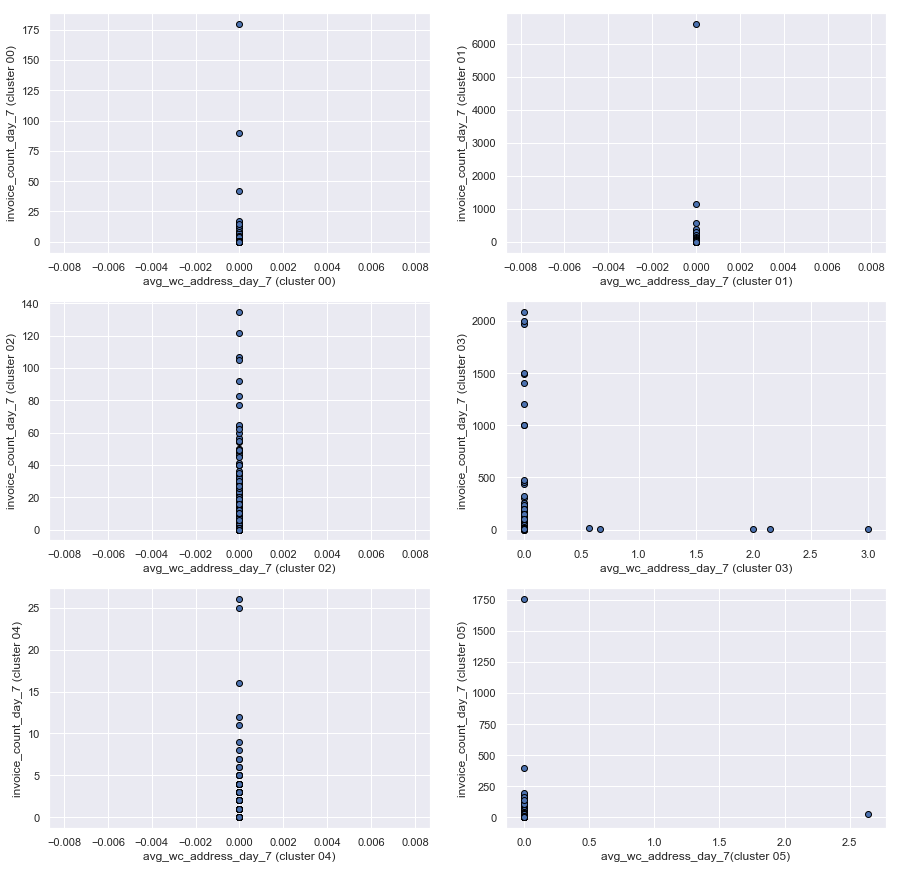

In [21]:
############################## Analysis: Cluster 00 (day 7 model) ##############################################

#### 'avg_wc_address_day_7' vs. 'invoice_count_day7'

# Pair-to-pair cross-validation plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
# ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

# cluster 00 ------------------------------------------------------ 
x0 = df_c0_final_feature_day_7['avg_wc_address_day_7']
y0 = df_c0_final_feature_day_7['invoice_count_day_7']

ax0.scatter(x0, y0, edgecolors=(0, 0, 0))
ax0.set_xlabel('avg_wc_address_day_7 (cluster 00)')
ax0.set_ylabel('invoice_count_day_7 (cluster 00)')


# cluster 01 ------------------------------------------------------ 
x1 = df_c1_final_feature_day_7['avg_wc_address_day_7']
y1 = df_c1_final_feature_day_7['invoice_count_day_7']

ax1.scatter(x1, y1, edgecolors=(0, 0, 0))
ax1.set_xlabel('avg_wc_address_day_7 (cluster 01)')
ax1.set_ylabel('invoice_count_day_7 (cluster 01)')


# cluster 02 ------------------------------------------------------ 
x2 = df_c2_final_feature_day_7['avg_wc_address_day_7']
y2 = df_c2_final_feature_day_7['invoice_count_day_7']

ax2.scatter(x2, y2, edgecolors=(0, 0, 0))
ax2.set_xlabel('avg_wc_address_day_7 (cluster 02)')
ax2.set_ylabel('invoice_count_day_7 (cluster 02)')

# cluster 03 ------------------------------------------------------ 
x3 = df_c3_final_feature_day_7['avg_wc_address_day_7']
y3 = df_c3_final_feature_day_7['invoice_count_day_7']

ax3.scatter(x3, y3, edgecolors=(0, 0, 0))
ax3.set_xlabel('avg_wc_address_day_7 (cluster 03)')
ax3.set_ylabel('invoice_count_day_7 (cluster 03)')

# cluster 04 ------------------------------------------------------ 
x4 = df_c4_final_feature_day_7['avg_wc_address_day_7']
y4 = df_c4_final_feature_day_7['invoice_count_day_7']

ax4.scatter(x4, y4, edgecolors=(0, 0, 0))
ax4.set_xlabel('avg_wc_address_day_7 (cluster 04)')
ax4.set_ylabel('invoice_count_day_7 (cluster 04)')


# cluster 05 ------------------------------------------------------ 
x5 = df_c5_final_feature_day_7['avg_wc_address_day_7']
y5 = df_c5_final_feature_day_7['invoice_count_day_7']

ax5.scatter(x5, y5, edgecolors=(0, 0, 0))
ax5.set_xlabel('avg_wc_address_day_7(cluster 05)')
ax5.set_ylabel('invoice_count_day_7 (cluster 05)')

plt.show()

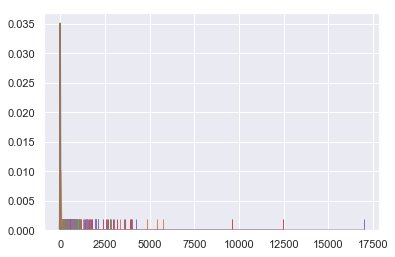

In [33]:
# Feature Distribution Plots for Each Cluster
# ----------------------------------------------------------------------
# Plot the distributions (column-wise) (if you just want some columns)
# ----------------------------------------------------------------------
sns.distplot(df_c0_final_feature_day_7[['client_count_day_7']], hist=False, rug=True)
sns.distplot(df_c1_final_feature_day_7[['client_count_day_7']], hist=False, rug=True)
sns.distplot(df_c2_final_feature_day_7[['client_count_day_7']], hist=False, rug=True)
sns.distplot(df_c3_final_feature_day_7[['client_count_day_7']], hist=False, rug=True)
sns.distplot(df_c4_final_feature_day_7[['client_count_day_7']], hist=False, rug=True)
sns.distplot(df_c5_final_feature_day_7[['client_count_day_7']], hist=False, rug=True)
# plt.show()


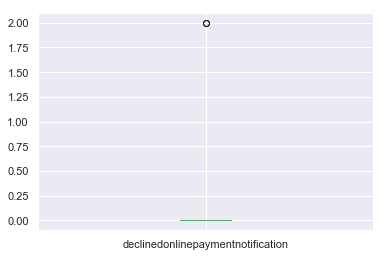

In [68]:
# Feature Distribution Plots for Each Cluster
# ----------------------------------------------------------------------
# Plot the distributions (column-wise) (if you just want some columns)
# ----------------------------------------------------------------------
mylist = ['declinedonlinepaymentnotification']
boxplot = df_c0_final_feature_day_7.boxplot(column=mylist)


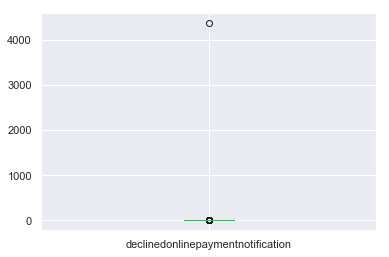

In [69]:
boxplot = df_c5_final_feature_day_7.boxplot(column=mylist)

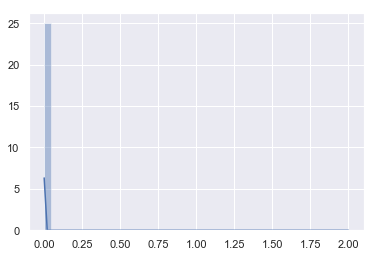

In [73]:
sns.distplot(df_c0_final_feature_day_7[['declinedonlinepaymentnotification']], hist=True)
# sns.distplot(df_c2_final_feature_day_7[['declinedonlinepaymentnotification']], hist=False, rug=True)

# 2. Day 7: Gaussian Mixture Model (GMM)